# Importation des données

In [1]:
import yfinance as yf
import datetime
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from selenium.webdriver.edge.options import Options
import time
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

import json

In [2]:
def random_portfolio(symbols_list,data,n):
    sample = random.sample(symbols_list,n)
    return data[sample]

In [28]:
# Spécifiez le chemin vers msedgedriver
msedgedriver_path = "C:\\Users\\Irish\\Desktop\\Informatique\\Python\\Pi2\\msedgedriver.exe"
# ATTENTION A CE QUE LE CHEMIN SOIT LE BON !
service = Service(msedgedriver_path)

# Configurez les options de Edge
options = Options()
options.add_argument("--incognito")
options.add_argument("--disable-notifications")

# Créez une instance du navigateur Edge avec les options et le service spécifiés
browser = webdriver.Edge(service=service, options=options)

# URL de la page de connexion
path = "https://login.yahoo.com/config/login?.src=finance&.intl=us&.lang=en-US&.done=https%3A%2F%2Ffinance.yahoo.com%2Fquotes%2Flogin%2Fview%2Fv1%2F"
browser.get(path)

# Remplissez le formulaire de connexion
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.NAME, "username"))).send_keys("irishrugbyman@gmail.com")
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.NAME, "signin"))).click()
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.NAME, "password"))).send_keys("F$Pi2YahooFinance20")
WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.ID, "login-signin"))).click()

# Accédez à l'URL de la page du screener Yahoo Finance
url = "https://finance.yahoo.com/screener/1745ba28-6f7f-4504-a2db-9a98b89ff912?offset=0&count=100"
browser.get(url)

# Attendez que la page charge et que le tableau soit présent
time.sleep(5)
# Utilisez WebDriverWait et EC pour une approche plus robuste

# Récupérez le contenu HTML de la page
content = browser.page_source

# Utilisez pandas pour lire le tableau directement à partir du contenu HTML
dfs = pd.read_html(content)
df = dfs[0]

# Fermez le navigateur
browser.quit()

# Récupérez la liste des symboles
symbols = df["Symbol"].tolist()

# Utilisez yfinance pour télécharger les données des ETFs
etf_data = yf.download(symbols, start='2018-01-01')['Adj Close']
etf_data

[*********************100%%**********************]  100 of 100 completed


,00662.TW,00733.TW,00757.TW,00762.TW,1397.T,1480.T,1545.T,BLCN,DBX5.DE,DWAT,...,XMMO,XMTD.L,XMTW.L,XMTW.SW,XMUS.SW,XQQ.TO,XSD,XUTC.SW,ZNQ-U.TO,ZQQ.TO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,20674.601562,15324.897461,7184.892578,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,26.160000,NaN,NaN,NaN,20674.601562,15324.897461,7184.892578,NaN,23.799999,8.120492,...,41.145035,28.160000,2094.00,NaN,NaN,53.974533,69.953026,NaN,NaN,48.332352
2018-01-03,26.500000,NaN,NaN,NaN,20674.601562,15324.897461,7184.892578,NaN,24.165001,8.216602,...,41.730083,28.160000,2151.25,28.469999,71.239998,54.501411,71.011307,NaN,NaN,48.800457
2018-01-04,26.820000,NaN,NaN,NaN,21150.607422,15324.897461,7361.089844,NaN,24.059999,8.266745,...,41.739674,28.990000,2142.75,28.469999,72.250000,54.602737,71.516182,NaN,NaN,48.917484
2018-01-05,26.809999,NaN,NaN,NaN,21150.607422,15324.897461,7390.456055,NaN,24.295000,8.324549,...,42.046589,29.235001,2155.50,28.469999,72.440002,55.109352,71.749199,NaN,NaN,49.356339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16,67.750000,57.549999,66.150002,51.099998,36030.000000,25200.000000,24795.000000,22.610001,47.195000,10.115000,...,89.309998,51.375000,4055.00,44.235001,119.779999,127.870003,210.350006,80.360001,36.590000,118.250000
2024-01-17,68.050003,57.150002,66.199997,51.450001,35880.000000,25100.000000,25040.000000,22.309999,46.509998,10.050000,...,89.029999,50.410000,3983.00,43.810001,119.839996,126.980003,207.919998,80.360001,36.279999,117.599998
2024-01-18,67.849998,56.500000,65.750000,51.349998,35830.000000,25100.000000,25070.000000,22.090000,47.730000,10.090000,...,89.839996,51.820000,4084.50,44.930000,120.580002,129.020004,214.289993,80.360001,36.970001,119.389999


In [26]:
ran_port = (random_portfolio(symbols,etf_data,10))
ran_port = ran_port.bfill()
ran_port

KeyError: "['SOXX' 'USAUSA.SW' 'IYF' 'FCTR' 'HTWN.MI' 'IXN' '1480.T' 'IAK' 'FXL'\n 'HTWN.L'] not in index"

In [11]:
# Définir la date de fin comme la date actuelle
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Calculer la date de début comme 6 ans avant la date actuelle
start_date = (datetime.datetime.now() - datetime.timedelta(days=365*6)).strftime('%Y-%m-%d')

# Symbole du CAC 40 sur Yahoo Finance
cac_40_symbol = '^FCHI'
s_p_500_symbol = '^GSPC'
oddo_symbol ='0P00000QLG.F'
echiquier_symbol ='0P0000YRTT.F'

# Récupérer les données historiques à l'aide de yfinance
cac_40_data = yf.download(cac_40_symbol, start=start_date, end=end_date)
s_p_500_data = yf.download(s_p_500_symbol, start=start_date, end=end_date)
oddo_data = yf.download(oddo_symbol, start=start_date, end=end_date)
echiquier_data = yf.download(echiquier_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [29]:
# Calcul du rendement simple

import pandas as pd
cac_40_data['Rendement'] = cac_40_data['Close'].pct_change()
s_p_500_data['Rendement'] = s_p_500_data['Close'].pct_change()
oddo_data['Rendement'] = oddo_data['Close'].pct_change()
echiquier_data['Rendement'] = echiquier_data['Close'].pct_change()
ran_port['Rendement'] = ran_port.pct_change()

ValueError: Cannot set a DataFrame with multiple columns to the single column Rendement

In [13]:
#Calcul rendement cumulé
cac_40_data['Rendement Cumulé'] = (1 + cac_40_data['Rendement']).cumprod()
s_p_500_data['Rendement Cumulé'] = (1 + s_p_500_data['Rendement']).cumprod()
oddo_data['Rendement Cumulé'] = (1 + oddo_data['Rendement']).cumprod()
echiquier_data['Rendement Cumulé'] = (1 + echiquier_data['Rendement']).cumprod()

# Graphique des différentes performances

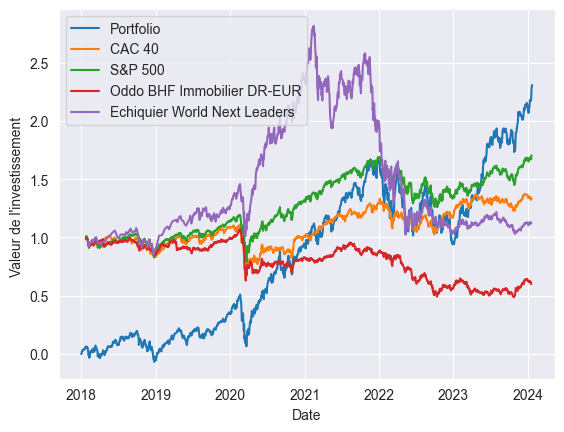

In [14]:
import matplotlib.pyplot as plt

returns = ran_port.pct_change()
alphas = .05*np.ones(returns.shape[1])
portfolio = np.random.dirichlet(alphas, size=1)
    
plt.plot(returns.fillna(0).dot(portfolio.T).add(1).cumprod().sub(1),label ='Portfolio')
plt.plot(cac_40_data['Rendement Cumulé'], label='CAC 40')
plt.plot(s_p_500_data['Rendement Cumulé'],label='S&P 500')
plt.plot(oddo_data['Rendement Cumulé'],label ='Oddo BHF Immobilier DR-EUR')
plt.plot(echiquier_data['Rendement Cumulé'],label ='Echiquier World Next Leaders')
plt.xlabel("Date")
plt.ylabel("Valeur de l'investissement ")
plt.legend()
plt.grid(True)
plt.show()


# Tableau des volatilités

In [39]:
import pandas as pd

def calculer_volatilite_annuelle_multiple(dataframes, annee_debut, annee_fin):

    # Initialiser un DataFrame pour stocker les résultats de la volatilité
    resultats_volatilite = pd.DataFrame()

    # Calculer la volatilité annuelle pour chaque année et chaque actif financier
    for annee in range(annee_debut, annee_fin + 1):
        for df, nom_actif in dataframes:

            df['Annee'] = df.index.year
            # Filtrer les données pour l'année en cours
            donnees_annee = df[df['Annee'] == annee]

            # Calculer la volatilité annuelle
            volatilite_annuelle = donnees_annee['Rendement'].std() * (252**0.5) *100 # 252 jours de trading par an

            # Ajouter les résultats au DataFrame
            resultats_volatilite.loc[annee, nom_actif] = volatilite_annuelle

    return resultats_volatilite

# Exemple d'utilisation
dataframes = [(cac_40_data, 'CAC 40'), (s_p_500_data, 'S&P 500'), (oddo_data, 'Oddo BHF DR-EUR'), (echiquier_data, 'Echiquier WNL')]
resultats_volatilite = calculer_volatilite_annuelle_multiple(dataframes, 2018, 2023)

def calculate_annual_portfolio_volatility(returns, weights, start_year, end_year):
    annual_volatility = {}
    for year in range(start_year, end_year + 1):
        yearly_returns = returns[returns.index.year == year]
        if not yearly_returns.empty:
            # Ensure there are no NaN values
            yearly_returns = yearly_returns.dropna()
            # Calculate the covariance matrix for the year
            covariance_matrix = yearly_returns.cov() * 252  # Annualize the covariance matrix
            # Calculate the portfolio variance for the year
            portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
            # Calculate the portfolio volatility (standard deviation) for the year
            portfolio_volatility = np.sqrt(portfolio_variance)
            annual_volatility[year] = portfolio_volatility
    return annual_volatility

# Assuming ran_port is a DataFrame with asset returns and portfolio_weights is a numpy array with the weights
num_assets = ran_port.shape[1]
portfolio_weights = np.random.dirichlet(np.ones(num_assets), size=1)[0]  # Example random weights for all assets
annual_portfolio_volatility = calculate_annual_portfolio_volatility(ran_port.pct_change(), portfolio_weights, 2018, 2023)

# Add the portfolio volatility to the resultats_volatilite DataFrame
resultats_volatilite['Portfolio'] = resultats_volatilite.index.map(annual_portfolio_volatility)

# Convert volatility to percentage
resultats_volatilite['Portfolio'] = resultats_volatilite['Portfolio'] * 100

print( "         Tableau de volaitilité par année (%)        \n")
print(resultats_volatilite)


         Tableau de volaitilité par année (%)        

         CAC 40    S&P 500  Oddo BHF DR-EUR  Echiquier WNL  Portfolio
2018  13.979888  17.430986        13.346349      54.713789   9.588230
2019  13.258789  12.472062        12.433247      23.474110   8.358577
2020  32.326159  34.430996        30.741885      33.216287  19.692777
2021  13.935745  13.100093        14.615208      30.605643  13.029704
2022  22.291126  24.173530        28.471978      44.047438  19.732814
2023  13.862633  13.092856        25.515268      12.868938  10.905817


# Tableau des performances

In [41]:
def calculer_rendement_total_annuel(dataframes, annee_debut, annee_fin):

    # Initialiser un DataFrame pour stocker les résultats du rendement total
    resultats_rendement = pd.DataFrame()

    # Calculer le rendement total annuel pour chaque année et chaque actif financier
    for annee in range(annee_debut, annee_fin + 1):
        for df, nom_actif in dataframes:

            df['Annee'] = df.index.year
            # Filtrer les données pour l'année en cours
            donnees_annee = df[df['Annee'] == annee]

            # Calculer le rendement total annuel
            rendement_total_annuel = (donnees_annee['Rendement'] + 1).prod() - 1
            rendement_total_annuel *= 100  # Pourcentage

            # Ajouter les résultats au DataFrame
            resultats_rendement.loc[annee, nom_actif] = rendement_total_annuel

    return resultats_rendement

# Exemple d'utilisation
dataframes = [(cac_40_data, 'CAC 40'), (s_p_500_data, 'S&P 500'), (oddo_data, 'Oddo BHF DR-EUR'), (echiquier_data, 'Echiquier WNL')]
resultats_rendement = calculer_rendement_total_annuel(dataframes, 2018, 2023)

def calculate_annual_total_return_portfolio(returns, weights, start_year, end_year):
    annual_total_return = {}
    for year in range(start_year, end_year + 1):
        yearly_returns = returns[returns.index.year == year]
        if not yearly_returns.empty:
            # Calculate the weighted returns
            weighted_returns = yearly_returns.multiply(weights, axis='columns')
            # Sum the weighted returns across all assets to get the portfolio return
            portfolio_return = weighted_returns.sum(axis=1)
            # Calculate the total annual return for the portfolio
            total_return_annual = (portfolio_return + 1).prod() - 1
            annual_total_return[year] = total_return_annual
    return annual_total_return

# Assuming ran_port is a DataFrame with asset returns and portfolio_weights is a numpy array with the weights
# Make sure the number of weights matches the number of assets in ran_port

annual_total_return_portfolio = calculate_annual_total_return_portfolio(ran_port.pct_change(), portfolio_weights, 2018, 2023)

# Add the portfolio total return to the resultats_rendement DataFrame
resultats_rendement['Portfolio'] = resultats_rendement.index.map(lambda x: annual_total_return_portfolio.get(x, np.nan) * 100)


print("        Tableau de performance par année (%)      \n")
print(resultats_rendement)


        Tableau de performance par année (%)      

         CAC 40    S&P 500  Oddo BHF DR-EUR  Echiquier WNL  Portfolio
2018 -14.535358 -11.703578       -14.495263     -10.749506  -4.459637
2019  26.367615  28.878070        15.385926      39.005520  20.440558
2020  -7.136929  16.258923       -16.107988      91.424298  17.107869
2021  28.850681  26.892739         5.954503     -15.801945   7.240987
2022  -9.496256 -19.442827       -36.117492     -47.805274 -17.650233
2023  16.519309  24.230501        13.901567       8.192980  26.124954


In [42]:
styled_df = resultats_rendement.style \
    .format("{:.2f}") \
    .set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
         {'selector': 'td', 'props': [('text-align', 'center')]},
         {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f2f2f2')]},
         {'selector': 'tr:nth-of-type(even)', 'props': [('background-color', 'white')]},
         {'selector': 'tr:hover', 'props': [('background-color', '#ffff99')]}]
    ) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='#ffcccb') \
    .bar(subset=['Portfolio'], color='#5fba7d')

# To display the styled DataFrame in a Jupyter notebook
styled_df


,CAC 40,S&P 500,Oddo BHF DR-EUR,Echiquier WNL,Portfolio
2018,-14.54,-11.70,-14.50,-10.75,-4.46
2019,26.37,28.88,15.39,39.01,20.44
2020,-7.14,16.26,-16.11,91.42,17.11
2021,28.85,26.89,5.95,-15.80,7.24
2022,-9.50,-19.44,-36.12,-47.81,-17.65
2023,16.52,24.23,13.90,8.19,26.12


In [45]:
from tabulate import tabulate

print(tabulate(resultats_rendement, headers='keys', tablefmt='pretty'))


+------+---------------------+--------------------+---------------------+---------------------+---------------------+
|      |       CAC 40        |      S&P 500       |   Oddo BHF DR-EUR   |    Echiquier WNL    |      Portfolio      |
+------+---------------------+--------------------+---------------------+---------------------+---------------------+
| 2018 | -14.535358019063215 | -11.70357816906521 | -14.495263490620946 | -10.749505890717248 | -4.459636876462525  |
| 2019 | 26.367615139382817  | 28.87807022515858  | 15.385926078784863  |  39.0055197439896   |   20.440558330033   |
| 2020 | -7.136929006432657  | 16.25892305570624  | -16.107987719908202 |  91.42429800544795  | 17.107869079564054  |
| 2021 | 28.850680886964962  | 26.892738661371318 | 5.9545033999201635  | -15.801944811624026 |  7.240987077500538  |
| 2022 |  -9.49625599128423  | -19.44282720342928 | -36.11749210930082  | -47.80527361170199  | -17.650232833055213 |
| 2023 | 16.519309471982034  | 24.23050079762983  | 13.9

# Matrice de corrélation

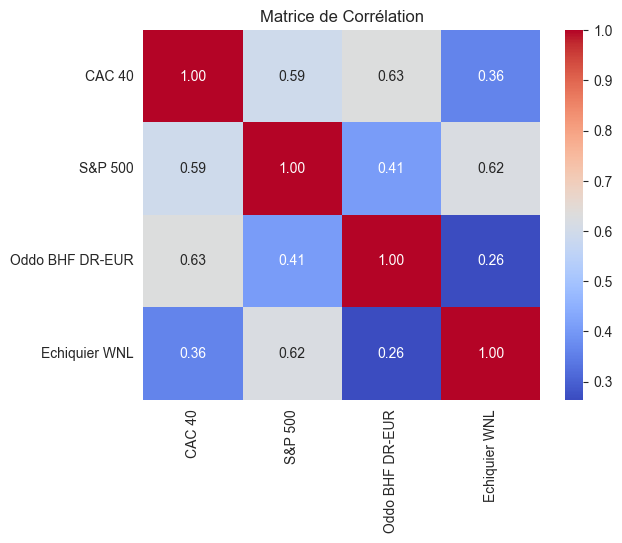

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple : Création d'un DataFrame avec des données fictives
data = {
    'CAC 40': cac_40_data['Rendement'],
    'S&P 500': s_p_500_data['Rendement'],
    'Oddo BHF DR-EUR': oddo_data['Rendement'],
    'Echiquier WNL': echiquier_data['Rendement']
}

df = pd.DataFrame(data)

# Calcul de la matrice de corrélation
matrice_corr = df.corr()

# Affichage de la matrice de corrélation avec seaborn
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()



